<a href="https://colab.research.google.com/github/6Fun6Maker6/-/blob/main/%D0%94%D0%BE%D0%B1%D1%80%D0%BE_%D0%BF%D0%BE%D0%B6%D0%B0%D0%BB%D0%BE%D0%B2%D0%B0%D1%82%D1%8C_%D0%B2_Colab!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

from google.colab import files
import pandas as pd
import io


uploaded = files.upload()


filename = list(uploaded.keys())[0]
print(f"Загружен файл: {filename}")


df = pd.read_csv(io.BytesIO(uploaded[filename]), parse_dates=['Дата'], dayfirst=True)
df = df.sort_values('Дата').reset_index(drop=True)
df.columns = ['date', 'services']

print("Первые 5 строк данных:")
print(df.head())
print(f"\nВсего записей: {len(df)}")
print(f"Период данных: с {df['date'].min()} по {df['date'].max()}")

Saving брони.csv to брони.csv
Загружен файл: брони.csv
Первые 5 строк данных:
         date  services
0  2025-01-02         2
1  2025-01-03        10
2  2025-01-04        16
3  2025-01-05        26
4  2025-01-06         6

Всего записей: 295
Период данных: с 2025-01-02 по 2025-10-31


Примеры дат в данных:
0    2025-01-02
1    2025-01-03
2    2025-01-04
3    2025-01-05
4    2025-01-06
5    2025-01-07
6    2025-01-08
7    2025-01-09
8    2025-01-10
9    2025-01-11
Name: date, dtype: object

Тип данных столбца date: object
✓ Успешно преобразовано с format='mixed'

После преобразования:
Тип данных столбца date: datetime64[ns]
Пропущенных дат: 0
Примеры преобразованных дат:
0   2025-01-02
1   2025-01-03
2   2025-01-04
3   2025-01-05
4   2025-01-06
Name: date, dtype: datetime64[ns]

Продолжаем с 295 корректными записями
Всего дней в периоде: 303
Дней с данными: 295
Пропущенных дней: 8

Дней когда спа не работал: 8


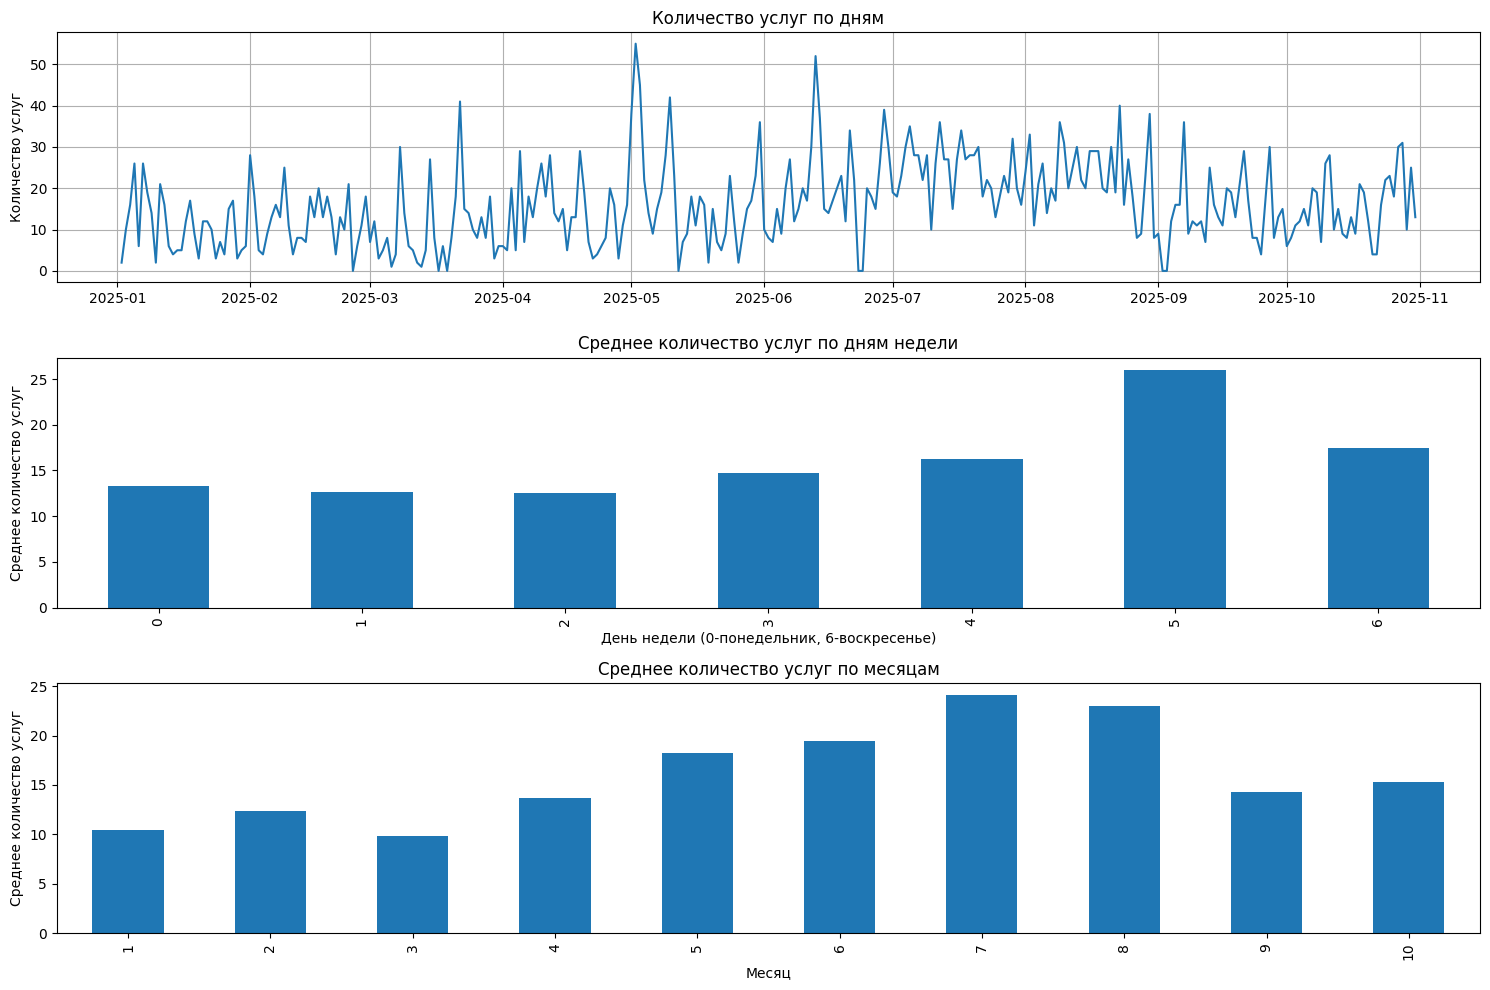


Дополнительная информация:
Общий период: с 2025-01-02 по 2025-10-31
Всего дней в датасете: 303
Среднее количество услуг в день: 16.12
Максимальное количество услуг: 55.0
Минимальное количество услуг: 0.0


In [2]:

print("Примеры дат в данных:")
print(df['date'].head(10))
print(f"\nТип данных столбца date: {df['date'].dtype}")


t
    df['date'] = pd.to_datetime(df['date'], format='mixed', dayfirst=True)
    print("✓ Успешно преобразовано с format='mixed'")

except Exception as e:
    print(f"Способ 1 не сработал: {e}")

    try:

        df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True, dayfirst=True)
        print("✓ Успешно преобразовано с infer_datetime_format=True")

    except Exception as e:
        print(f"Способ 2 не сработал: {e}")

        try:

            df['date'] = pd.to_datetime(df['date'], errors='coerce')

            nan_count = df['date'].isna().sum()
            if nan_count > 0:
                print(f"⚠ Не удалось преобразовать {nan_count} дат")

                problematic_dates = df[df['date'].isna()]
                print("Проблемные строки:")
                print(problematic_dates.head())
            print("✓ Успешно преобразовано с errors='coerce'")

        except Exception as e:
            print(f"Способ 3 не сработал: {e}")

            print("Пробуем очистить данные...")

            df['date'] = df['date'].astype(str).str.strip()
            df['date'] = pd.to_datetime(df['date'], errors='coerce')
            print("✓ Преобразовано после очистки")


print(f"\nПосле преобразования:")
print(f"Тип данных столбца date: {df['date'].dtype}")
print(f"Пропущенных дат: {df['date'].isna().sum()}")
print(f"Примеры преобразованных дат:")
print(df['date'].head())


if df['date'].isna().any():
    print(f"\nУдаляем {df['date'].isna().sum()} строк с некорректными датами")
    df = df.dropna(subset=['date']).reset_index(drop=True)


print(f"\nПродолжаем с {len(df)} корректными записями")


date_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')
print(f"Всего дней в периоде: {len(date_range)}")
print(f"Дней с данными: {len(df)}")
print(f"Пропущенных дней: {len(date_range) - len(df)}")


df_full = pd.DataFrame({'date': date_range})
df_full = df_full.merge(df, on='date', how='left')


non_working_days = df_full[df_full['services'].isna()]
print(f"\nДней когда спа не работал: {len(non_working_days)}")

df_full['services'] = df_full['services'].fillna(0)


df_full['day_of_week'] = df_full['date'].dt.dayofweek
df_full['month'] = df_full['date'].dt.month
df_full['is_weekend'] = (df_full['date'].dt.dayofweek >= 5).astype(int)
df_full['day_of_month'] = df_full['date'].dt.day

plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(df_full['date'], df_full['services'])
plt.title('Количество услуг по дням')
plt.ylabel('Количество услуг')
plt.grid(True)

plt.subplot(3, 1, 2)
df_full.groupby('day_of_week')['services'].mean().plot(kind='bar')
plt.title('Среднее количество услуг по дням недели')
plt.xlabel('День недели (0-понедельник, 6-воскресенье)')
plt.ylabel('Среднее количество услуг')

plt.subplot(3, 1, 3)
df_full.groupby('month')['services'].mean().plot(kind='bar')
plt.title('Среднее количество услуг по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Среднее количество услуг')

plt.tight_layout()
plt.show()


print(f"\nДополнительная информация:")
print(f"Общий период: с {df_full['date'].min().strftime('%Y-%m-%d')} по {df_full['date'].max().strftime('%Y-%m-%d')}")
print(f"Всего дней в датасете: {len(df_full)}")
print(f"Среднее количество услуг в день: {df_full['services'].mean():.2f}")
print(f"Максимальное количество услуг: {df_full['services'].max()}")
print(f"Минимальное количество услуг: {df_full['services'].min()}")

In [3]:

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_full[['services']])


def create_sequences(data, sequence_length=30):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length)])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

SEQUENCE_LENGTH = 30
X, y = create_sequences(scaled_data, SEQUENCE_LENGTH)


train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (218, 30, 1)
Размер тестовой выборки: (55, 30, 1)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 30, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.0468 - mae: 0.1663 - val_loss: 0.0200 - val_mae: 0.1200
Epoch 2/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0347 - mae: 0.1431 - val_loss: 0.0235 - val_mae: 0.1333
Epoch 3/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0364 - mae: 0.1557 - val_loss: 0.0199 - val_mae: 0.1183
Epoch 4/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0306 - mae: 0.1355 - val_loss: 0.0212 - val_mae: 0.1255
Epoch 5/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0322 - mae: 0.1424 - val_loss: 0.0204 - val_mae: 0.1207
Epoch 6/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0312 - mae: 0.1375 - val_loss: 0.0209 - val_mae: 0.1237
Epoch 7/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0314 - mae: 0.1413 - val_loss: 0.0207 - val_mae: 0.1226
Epoch 8/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0309 - mae: 0.1381 - val_loss: 0.0206 - val_mae: 0.1218
Epoch 9/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

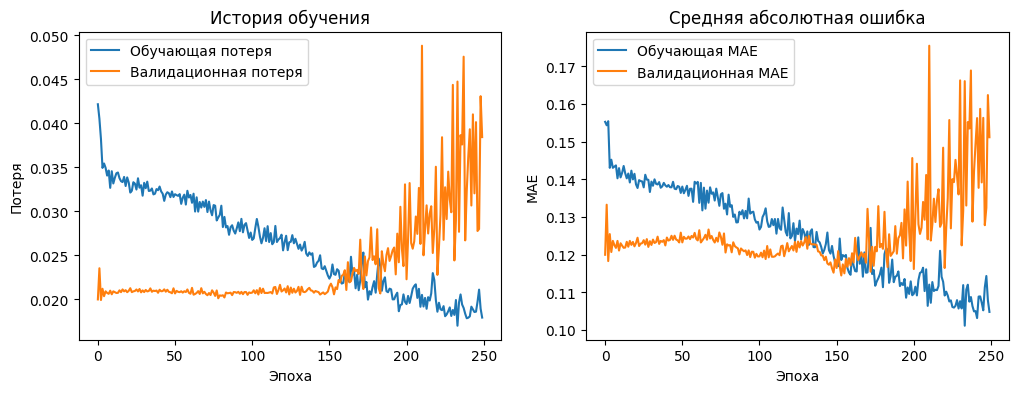

In [11]:

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(SEQUENCE_LENGTH, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mae'])

print(model.summary())


history = model.fit(
    X_train, y_train,
    batch_size=16,
    epochs=250,
    validation_data=(X_test, y_test),
    verbose=1,
    shuffle=False
)


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Обучающая потеря')
plt.plot(history.history['val_loss'], label='Валидационная потеря')
plt.title('История обучения')
plt.xlabel('Эпоха')
plt.ylabel('Потеря')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Обучающая MAE')
plt.plot(history.history['val_mae'], label='Валидационная MAE')
plt.title('Средняя абсолютная ошибка')
plt.xlabel('Эпоха')
plt.ylabel('MAE')
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 328ms/step
Средняя абсолютная ошибка (MAE): 8.32
Средняя абсолютная процентная ошибка (MAPE): 68.93%


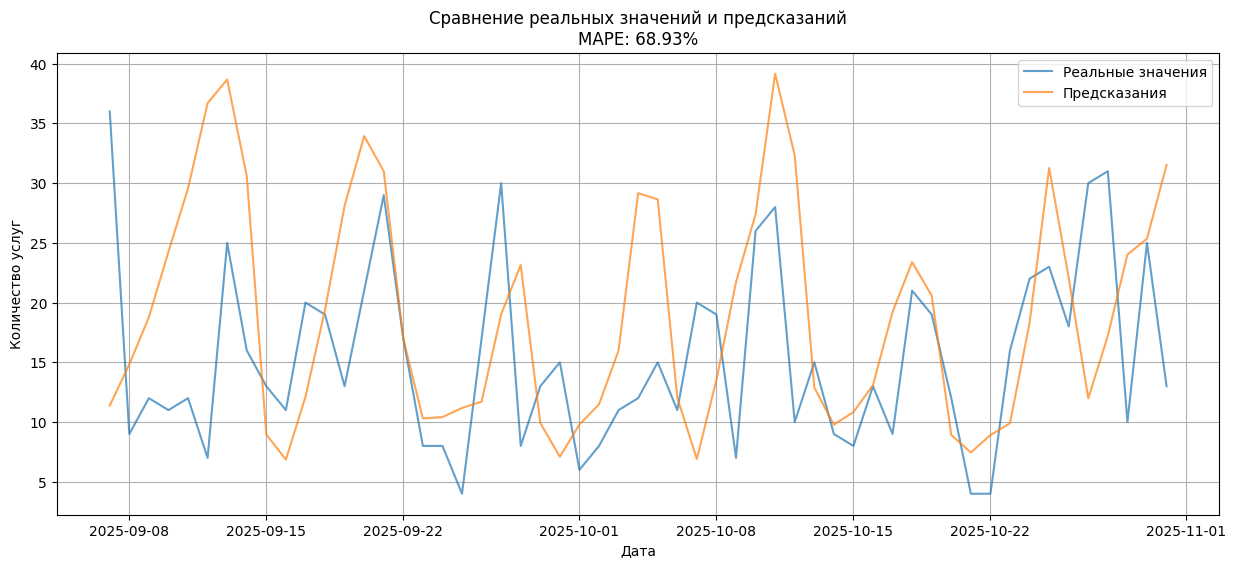

In [12]:

y_pred = model.predict(X_test)


y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_original = scaler.inverse_transform(y_pred)


mae = mean_absolute_error(y_test_original, y_pred_original)
mape = mean_absolute_percentage_error(y_test_original, y_pred_original) * 100

print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Средняя абсолютная процентная ошибка (MAPE): {mape:.2f}%")


test_dates = df_full['date'].iloc[train_size + SEQUENCE_LENGTH:train_size + SEQUENCE_LENGTH + len(y_test)]

plt.figure(figsize=(15, 6))
plt.plot(test_dates, y_test_original, label='Реальные значения', alpha=0.7)
plt.plot(test_dates, y_pred_original, label='Предсказания', alpha=0.7)
plt.title(f'Сравнение реальных значений и предсказаний\nMAPE: {mape:.2f}%')
plt.xlabel('Дата')
plt.ylabel('Количество услуг')
plt.legend()
plt.grid(True)
plt.show()

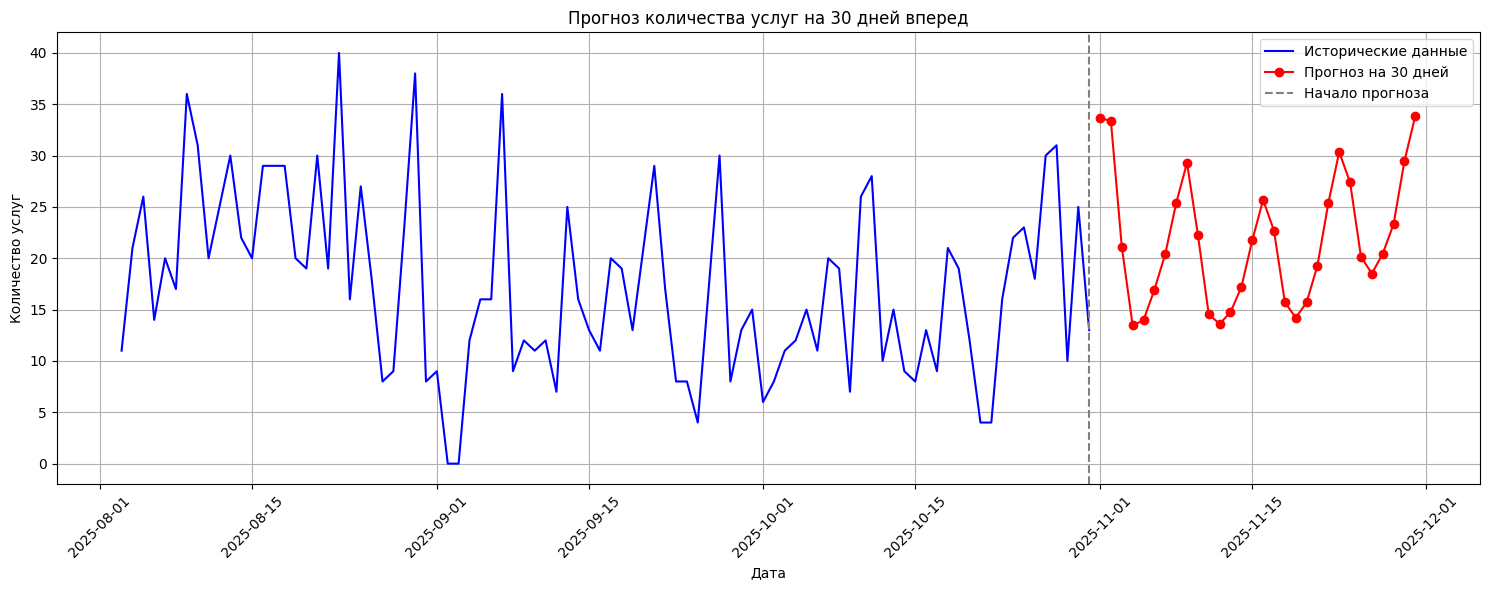

Прогноз на 30 дней вперед:
      Дата  Прогноз_услуг
2025-11-01           34.0
2025-11-02           33.0
2025-11-03           21.0
2025-11-04           13.0
2025-11-05           14.0
2025-11-06           17.0
2025-11-07           20.0
2025-11-08           25.0
2025-11-09           29.0
2025-11-10           22.0
2025-11-11           15.0
2025-11-12           14.0
2025-11-13           15.0
2025-11-14           17.0
2025-11-15           22.0
2025-11-16           26.0
2025-11-17           23.0
2025-11-18           16.0
2025-11-19           14.0
2025-11-20           16.0
2025-11-21           19.0
2025-11-22           25.0
2025-11-23           30.0
2025-11-24           27.0
2025-11-25           20.0
2025-11-26           19.0
2025-11-27           20.0
2025-11-28           23.0
2025-11-29           29.0
2025-11-30           34.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
def predict_future(model, last_sequence, days=30):
    """Прогноз на будущие дни"""
    future_predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(days):

        next_pred = model.predict(current_sequence.reshape(1, SEQUENCE_LENGTH, 1), verbose=0)
        future_predictions.append(next_pred[0, 0])


        current_sequence = np.roll(current_sequence, -1)
        current_sequence[-1] = next_pred[0, 0]

    return np.array(future_predictions)


last_sequence = scaled_data[-SEQUENCE_LENGTH:]


future_predictions_scaled = predict_future(model, last_sequence, days=30)
future_predictions = scaler.inverse_transform(future_predictions_scaled.reshape(-1, 1))


last_date = df_full['date'].iloc[-1]
future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, 31)]

plt.figure(figsize=(15, 6))


historical_dates = df_full['date'].iloc[-90:]
historical_services = df_full['services'].iloc[-90:]

plt.plot(historical_dates, historical_services, label='Исторические данные', color='blue')
plt.plot(future_dates, future_predictions, label='Прогноз на 30 дней', color='red', marker='o')
plt.axvline(x=last_date, color='gray', linestyle='--', label='Начало прогноза')

plt.title('Прогноз количества услуг на 30 дней вперед')
plt.xlabel('Дата')
plt.ylabel('Количество услуг')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


forecast_df = pd.DataFrame({
    'Дата': future_dates,
    'Прогноз_услуг': future_predictions.flatten().round()
})

print("Прогноз на 30 дней вперед:")
print(forecast_df.to_string(index=False))


forecast_df.to_csv('spa_forecast_next_30_days.csv', index=False)
files.download('spa_forecast_next_30_days.csv')